In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [2]:
data=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_jly.xlsx")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,19429,605224,12064,359904,438,17849
1,2020-07-02,21947,627171,19999,379903,378,18227
2,2020-07-03,22718,649889,14417,394320,444,18671
3,2020-07-04,24018,673907,14746,409066,611,19282
4,2020-07-05,23942,697849,15829,424895,421,19703


In [3]:
def chk_dirt(dt):
    drt_cnt=0
    if(len(dt.columns)):
        for i in list(dt.columns):
            if((True== "NaN" in dt[i])or (True == "" in dt[i]) or (True == " " in dt[i]) or (True == "?" in  dt[i])or (True == "####" in dt[i])):
                drt_cnt+=1
        if(drt_cnt):
            print("Unwanted Data Value Found")
    else:
        print("No Columns available to deal with or columns mixed with rows")

chk_dirt(data)

In [4]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [5]:
data.dtypes

Date               datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

In [6]:
data.ndim

2

In [7]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,31.000000,3.100000e+01,31.000000,3.100000e+01,31.000000,31.000000
mean,35838.677419,1.060138e+06,24119.290323,6.691798e+05,617.903226,26241.000000
std,11515.255682,3.293303e+05,7881.283035,2.198297e+05,153.308263,5744.633995
min,19429.000000,6.052240e+05,12064.000000,3.599040e+05,378.000000,17849.000000
25%,25675.500000,7.819520e+05,17940.500000,4.862580e+05,496.000000,21386.500000
50%,34820.000000,1.005642e+06,20977.000000,6.366030e+05,611.000000,25611.000000
75%,47463.500000,1.312572e+06,32194.500000,8.337420e+05,703.500000,31038.500000
max,57212.000000,1.696794e+06,37425.000000,1.095538e+06,1130.000000,36566.000000


In [8]:
###beginning the task of analysis(visually and quantitatively )

In [9]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']
tcol=['Total Confirmed','Total Recovered','Total Deceased']

In [10]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(data)*(np.sum(data[pcol[j]]*data[pcol[k]]))
            b=np.sum(data[pcol[j]])
            c=np.sum(data[pcol[k]])
            d=len(data)*np.sum(data[pcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[pcol[i]]*data[pcol[i+1]]))
        b=np.sum(data[pcol[i]])
        c=np.sum(data[pcol[i+1]])
        d=len(data)*np.sum(data[pcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

Daily Confirmed
Daily Recovered
2.467910283869839e-08
Daily Confirmed
Daily Deceased
4.926844728323745e-10
Daily Recovered
Daily Deceased
6.722307546992211e-10


<ipython-input-10-e405aa859196>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [11]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(data[pcol[j]],data[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[pcol[i]],data[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

Daily Confirmed Vs.Daily Recovered
0.9584912919153101
2.399167869037045e-17
Daily Confirmed Vs.Daily Deceased
0.8088928077510131
3.655789085793572e-08
Daily Recovered Vs.Daily Deceased
0.7553771006134645
9.024211203941874e-07


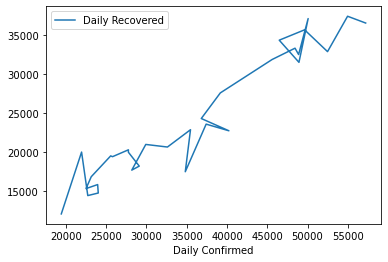

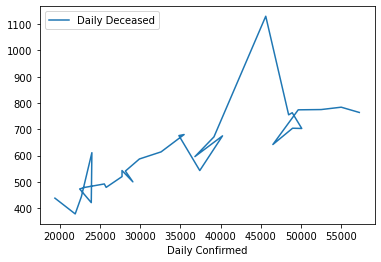

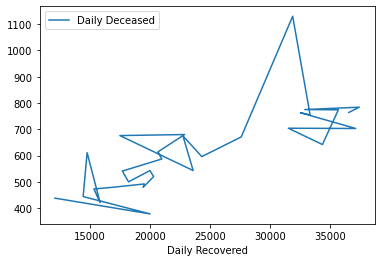

In [12]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1])

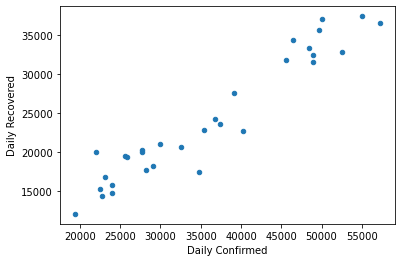

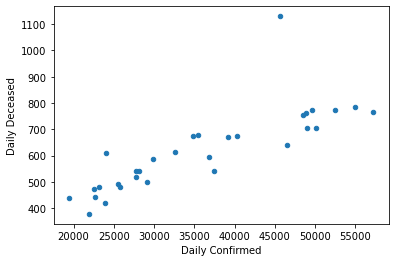

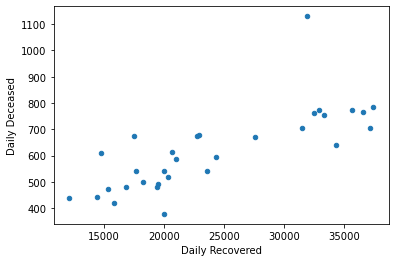

In [13]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1],kind="scatter")

In [14]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            a=len(data)*(np.sum(data[tcol[j]]*data[tcol[k]]))
            b=np.sum(data[tcol[j]])
            c=np.sum(data[tcol[k]])
            d=len(data)*np.sum(data[tcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[tcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(tcol[j])
            if(k!=3):
                print(tcol[k])
            else:
                print(tcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[tcol[i]]*data[tcol[i+1]]))
        b=np.sum(data[tcol[i]])
        c=np.sum(data[tcol[i+1]])
        d=len(data)*np.sum(data[tcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[tcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(tcol[i])
        print(tcol[i+1])
        print(r)
        
            

Total Confirmed
Total Recovered
-3.2331872052853675e-05
Total Confirmed
Total Deceased
3.000648943620156e-07
Total Recovered
Total Deceased
-3.3233942026256797e-07


<ipython-input-14-2344589cd845>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
<ipython-input-14-2344589cd845>:32: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [15]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            coef,pval=pearsonr(data[tcol[j]],data[tcol[k]])
            print(tcol[j]+" Vs."+tcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[tcol[i]],data[tcol[i+1]])
        print(tcol[i]+" Vs."+tcol[i+1])
        print(coef)
        print(pval)

Total Confirmed Vs.Total Recovered
0.9998134420635494
2.872236966373588e-51
Total Confirmed Vs.Total Deceased
0.9984366320829605
6.942747178721485e-38
Total Recovered Vs.Total Deceased
0.9980761175974013
1.4035993774896662e-36


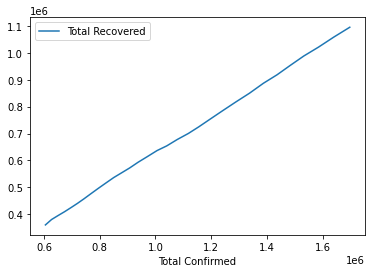

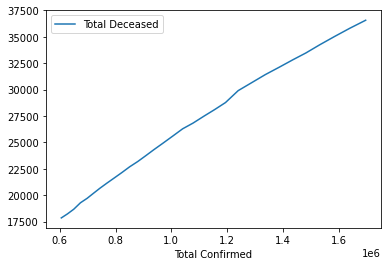

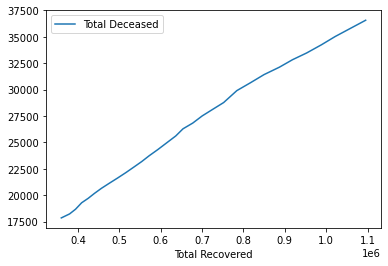

In [16]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k])
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1])

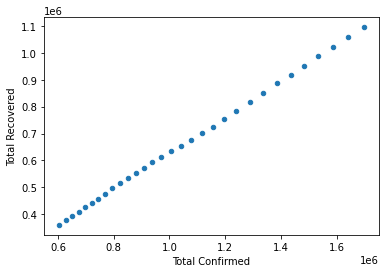

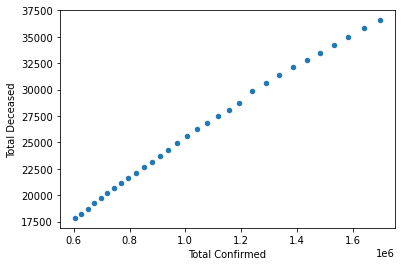

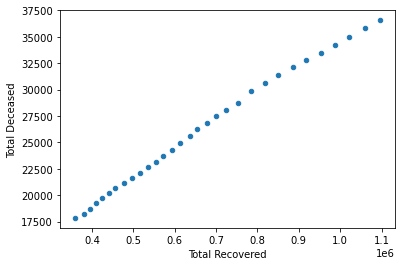

In [17]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1],kind="scatter")

In [18]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}
    
    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0

    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

    if(len(list(dys_cnt.keys()))>1):
        itr_lst=list(range(1,len(list(dys_cnt.keys()))))
        itr_lst.sort(reverse=True)
        for i in itr_lst:
            dys_cnt[list(dys_cnt.keys())[i]]=dys_cnt[list(dys_cnt.keys())[i]]-dys_cnt[list(dys_cnt.keys())[i-1]]        

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   10000
0     31


For: Total Confirmed
   100000  1000000
0      15       16


For: Daily Recovered
   10000
0     31


For: Total Recovered
   100000  1000000
0      28        3


For: Daily Deceased
   100  1000
0   31    -9


For: Total Deceased
   10000
0     31




In [19]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}

    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0


    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

            

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   10000
0     31


For: Total Confirmed
   100000  1000000
0      15       31


For: Daily Recovered
   10000
0     31


For: Total Recovered
   100000  1000000
0      28       31


For: Daily Deceased
   100  1000
0   31    22


For: Total Deceased
   10000
0     31


